<a href="https://colab.research.google.com/github/brunobro/temporal-variability-in-soybean-sowing-and-harvesting-deciphered-by-k-means-and-silhouette-scores/blob/main/CultivatingSoybeansAtDifferentTimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Temporal Variability in Soybean Sowing and Harvesting Deciphered by K-means and Silhouette Scores**

**Variables analyzed**
* PH	Plant Height
* IFP	Insertion of the first pod
* NLP	Number of legumes per plants
* NG	Number of grains per plants
* NGP	Number of grains per pod
* NS	Number of stems
* MHG	Mass of a thousand grains
* GY Grain Yield

---

Bruno Rodrigues de Oliveira1*, Francisco Charles dos Santos Silva, Ricardo Mezzomo2, Leandra Matos Barrozo2, Tatiane Scilewski da Costa Zanatta2, Joel Cabral dos Santos2, Carlos Henrique Conceição Sousa2, Yago Pinto Coelho2, Aurilucia do Nascimento Silva Caldas2, Renato Lustosa Sobrinho4,7, Jesper Ruben van Dijk5, Ibrahim A. Alaraidh6, Hamada AbdElgawad7, Francisco de Alcântara Neto3, Alan Mario Zuffo2*

1 Editora Pantanal, Nova Xavantina, MT, Brazil.

2 State University of Maranhão, Balsas, MA, Brazil.

3 Postgraduate Program in Agronomy, Federal University of Piaui, Teresina, PI, Brazil.

4 Department of Agronomy, Federal University of Technology-Paraná (UTFPR), Pato Branco 85503-390, PR, Brazil.

5 Geobiology, Department of Biology, University of Antwerp, 2610 Wilrijk Antwerp, Belgium.

6 Botany and Microbiology Department, College of Science, King Saud University, Riyadh 11451, Saudi Arabia.

7 Integrated Molecular Plant Physiology Research, Department of Biology, University of Antwerp, 2020 Antwerp, Belgium.

*Correspondence: bruno@editorapantanal.com.br; alan_zuffo@hotmail.com



#Python libraries

In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as smm

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  PowerTransformer

from scipy.spatial import distance

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Variables and dataset

In [ ]:
#Variables
Vars = ['PH', 'IFP', 'NLP', 'NG','NGP','NS', 'MHG', 'GY']

#Read data
df_all = pd.read_excel('data.xlsx')
display(df_all)

#Cultivars
cultivars_names = np.unique(df_all['Cultivar'])

#Dataset only variables and class
#df_data = df_all.copy()
#del df_data['Repetition']
#del df_data['Cultivar']

#Separates data by Season
df_time1 = df_all[df_all['Season'] == 1]
del df_time1['Season']

df_time2 = df_all[df_all['Season'] == 2]
del df_time2['Season']

,Season,Cultivar,Repetition,PH,IFP,NLP,NG,NGP,NS,MHG,GY
0,1,NEO 760 CE,1,58.800000,15.200000,98.200000,177.800000,1.810591,5.200000,152.201839,3232.821839
1,1,NEO 760 CE,2,58.600000,13.400000,102.000000,195.000000,1.852090,7.200000,141.685057,3517.356322
2,1,NEO 760 CE,3,63.400000,17.200000,100.400000,203.000000,2.021912,6.800000,148.811954,3391.459770
3,1,NEO 760 CE,4,60.266667,15.266667,100.200000,191.933333,1.894864,6.400000,148.498391,3312.580460
4,1,MANU IPRO,1,81.200000,18.000000,98.800000,173.000000,1.751012,7.400000,145.591494,3230.988506
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.333333,16.333333,75.733333,139.000000,1.837599,3.666667,135.186207,3348.931034
316,2,FTR 3190 IPRO,1,64.400000,16.600000,76.000000,168.000000,2.210526,3.600000,145.689655,3418.850575
317,2,FTR 3190 IPRO,2,64.600000,17.600000,116.800000,271.200000,2.321918,3.800000,147.241379,3651.586207
318,2,FTR 3190 IPRO,3,58.800000,14.800000,86.400000,180.600000,2.090278,2.200000,156.321839,3487.931034


In [ ]:
display(df_time1.describe())

,Repetition,PH,IFP,NLP,NG,NGP,NS,MHG,GY
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2.500000,65.985000,16.485000,57.965000,135.235000,2.299561,4.816667,162.288433,3428.452485
std,1.121544,8.312805,2.336679,19.341457,48.750239,0.370419,1.396291,18.430995,639.036468
min,1.000000,50.400000,10.800000,20.200000,47.800000,0.938838,2.200000,127.057241,1538.229885
25%,1.750000,59.900000,14.866667,43.983333,95.216667,2.116203,3.800000,148.865977,2941.818966
50%,2.500000,66.200000,16.400000,54.500000,129.200000,2.343498,4.800000,159.064713,3383.132184
75%,3.250000,70.500000,17.600000,71.700000,172.250000,2.485203,5.800000,176.734310,3857.750000
max,4.000000,91.000000,26.400000,116.400000,272.400000,4.753333,9.000000,215.996466,4930.000000


In [ ]:
display(df_time2.describe())

,Repetition,PH,IFP,NLP,NG,NGP,NS,MHG,GY
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2.500000,70.788333,14.445000,60.211667,134.936667,2.281716,3.326667,174.355711,3408.655151
std,1.121544,8.960469,3.285660,20.769423,70.467029,1.130483,1.137978,18.968408,314.724550
min,1.000000,47.600000,7.200000,24.800000,48.000000,1.149406,0.400000,127.762759,2625.913793
25%,1.750000,64.150000,12.200000,45.000000,95.050000,1.890307,2.600000,161.574598,3220.370690
50%,2.500000,69.800000,14.566667,54.300000,117.800000,2.209430,3.400000,174.097241,3413.977011
75%,3.250000,77.050000,16.650000,70.966667,157.500000,2.444377,4.000000,188.351609,3633.607759
max,4.000000,94.800000,24.200000,123.000000,683.400000,14.856522,9.000000,213.244828,4164.057471


In [ ]:
#Cultivar names
print('Cultivars:')
print('\n'.join(cultivars_names))

#Cultivar number
print('Total: ', len(cultivars_names))

Cultivars:
74K75RSF CE
77HO111I2X - GUAPORÉ
79I81RSF IPRO
82HO111 IPRO - HO COXIM IPRO
82I78RSF IPRO
83IX84RSF I2X
96R29 IPRO
97Y97 IPRO
98R30 CE
ADAPTA LTT 8402 IPRO
ATAQUE I2X
BRASMAX BÔNUS IPRO
BRASMAX OLIMPO IPRO
ELISA IPRO
EXPANDE LTT 8301 IPRO
FORTALECE L090183 RR
FORTALEZA IPRO
FTR 3179 IPRO
FTR 3190 IPRO
FTR 3868 IPRO
FTR 4280 IPRO
FTR 4288 IPRO
GNS7700 IPRO
GNS7900 IPRO - AMPLA
LAT 1330BT
LTT 7901 IPRO
LYNDA IPRO
M 8644 IPRO
MANU IPRO
MONSOY 8330I2X
MONSOY M8606I2X
NEO 760 CE
NEO 790 IPRO
NK 7777 IPRO
NK 8100 IPRO
NK 8770 IPRO
PAULA IPRO
SUZY IPRO
SYN2282IPRO
TMG 22X83I2X
Total:  40


## Pre-processing

Normalization of variables

In [ ]:
# Normalizes each variable for interval [0, 1]
# Remove the mean

def norm(df):
    df = df.copy() #Avoid overriding the original dataframe
    for col in Vars:
        #Removing the mean and scaling to unit variance
        df[col] = (df[col] - df[col].mean()) / df[col].std()

        #Normalize
        #df[col] = df[col] / df[col].max()

    return df

# Pre-processing stage
df_all_    = norm(df_all[Vars])
time1_vars = norm(df_time1[Vars])
time2_vars = norm(df_time2[Vars])

# Dataframe utilizados em outros locais. Contém o cultivar
df_time1_processed = df_time1.copy()
df_time1_processed[Vars] = time1_vars

df_time2_processed = df_time2.copy()
df_time2_processed[Vars] = time2_vars

#Dataframe with all data
df_all_processed = df_all.copy()
df_all_processed[Vars] = df_all_

print('Processed Dataset')
display(df_all_processed)

Processed Dataset


,Season,Cultivar,Repetition,PH,IFP,NLP,NG,NGP,NS,MHG,GY
0,1,NEO 760 CE,1,-1.070162,-0.087625,1.948935,0.706081,-0.571541,0.765259,-0.821378,-0.369246
1,1,NEO 760 CE,2,-1.092489,-0.682817,2.138289,0.990404,-0.522132,2.121701,-1.357242,0.196425
2,1,NEO 760 CE,3,-0.556663,0.573699,2.058561,1.122647,-0.319943,1.850413,-0.994104,-0.053865
3,1,NEO 760 CE,4,-0.906438,-0.065581,2.048595,0.939710,-0.471206,1.579124,-1.010081,-0.210681
4,1,MANU IPRO,1,1.430356,0.838229,1.978833,0.626735,-0.642475,2.257345,-1.158196,-0.372891
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,2.226652,0.287125,0.829420,0.064703,-0.539385,-0.274679,-1.688380,-0.138414
316,2,FTR 3190 IPRO,1,-0.445033,0.375302,0.842708,0.544084,-0.095381,-0.319894,-1.153195,0.000590
317,2,FTR 3190 IPRO,2,-0.422707,0.705964,2.875773,2.250018,0.037241,-0.184250,-1.074129,0.463282
318,2,FTR 3190 IPRO,3,-1.070162,-0.219890,1.360941,0.752366,-0.238548,-1.269403,-0.611451,0.137926


# Statistical analysis

## Statistical tests

In [ ]:
'''
Statistical analysis
'''
# For a confidence level of 5%
alpha = 0.05

# Levene’s and Shapiro-Wilk test in relation to Time (tratament)
trans_vari = []
trans_norm = []

def stat_test(df_all):
    for var in Vars:
        t1 = df_all.query('Season == 1')[var]
        t2 = df_all.query('Season == 2')[var]

        print('\nVARIABLE: ' + var)

        print('\nLevene test')
        w, pvalue = stats.levene(t1, t2)
        print('\tW:', w, ' | p-value', pvalue)
        if pvalue > alpha:
            print('\t Equal variance (fail to reject H0)')
        else:
            trans_vari.append(var)
            print('\t Not Equal variance (reject H0)')

        print('\nShapiro-Wilk test')
        w, pvalue = stats.shapiro(df_all[var])
        print('\tW:', w, ' | p-value', pvalue)
        if pvalue > alpha:
            print('\t Distribution is normal (fail to reject H0)')
        else:
            trans_norm.append(var)
            print('\t Distribution is not normal (reject H0)')

    print('\n')
    print('Applies the variance transformation: ', trans_vari)
    print('Applies the Normal distribution transformation: ', trans_norm)

# Raw data
print('\nTest for raw data')
stat_test(df_all_processed)


Test for raw data

VARIABLE: PH

Levene test
	W: 1.8990779531845894  | p-value 0.16915043449283146
	 Equal variance (fail to reject H0)

Shapiro-Wilk test
	W: 0.9904178977012634  | p-value 0.03474179282784462
	 Distribution is not normal (reject H0)

VARIABLE: IFP

Levene test
	W: 22.174547847051603  | p-value 3.7236496943589034e-06
	 Not Equal variance (reject H0)

Shapiro-Wilk test
	W: 0.9830715656280518  | p-value 0.0008017695508897305
	 Distribution is not normal (reject H0)

VARIABLE: NLP

Levene test
	W: 0.09612114743740717  | p-value 0.7567380983220569
	 Equal variance (fail to reject H0)

Shapiro-Wilk test
	W: 0.9419888854026794  | p-value 7.007842084405524e-10
	 Distribution is not normal (reject H0)

VARIABLE: NG

Levene test
	W: 0.22321331564233057  | p-value 0.6369264347842205
	 Equal variance (fail to reject H0)

Shapiro-Wilk test
	W: 0.8005578517913818  | p-value 1.5800137146619064e-19
	 Distribution is not normal (reject H0)

VARIABLE: NGP

Levene test
	W: 3.50170458073

## Transformation

In [ ]:
# Data transformation
print('\nTest for transformed data')

# For Normal Distribution transform
Pt = PowerTransformer(method="yeo-johnson")

# Copies to avoid changes to the original processed data
df_all_processed_transf = df_all_processed.copy()

# Applies transformation
trans_vars = np.unique(trans_vari + trans_norm)
trans_vari = []
trans_norm = []

for var in trans_vars:
    var_trans = Pt.fit_transform(df_all_processed_transf[var].to_numpy().reshape(-1, 1))
    df_all_processed_transf[var] = var_trans

# Verifies the normality and variance
stat_test(df_all_processed_transf)


Test for transformed data

VARIABLE: PH

Levene test
	W: 0.4178537068311115  | p-value 0.51847619686502
	 Equal variance (fail to reject H0)

Shapiro-Wilk test
	W: 0.9954059720039368  | p-value 0.4664144814014435
	 Distribution is normal (fail to reject H0)

VARIABLE: IFP

Levene test
	W: 22.215768602950153  | p-value 3.649680286644849e-06
	 Not Equal variance (reject H0)

Shapiro-Wilk test
	W: 0.9830814003944397  | p-value 0.0008055269136093557
	 Distribution is not normal (reject H0)

VARIABLE: NLP

Levene test
	W: 0.18513812865883003  | p-value 0.6672857504898205
	 Equal variance (fail to reject H0)

Shapiro-Wilk test
	W: 0.990484893321991  | p-value 0.03602983057498932
	 Distribution is not normal (reject H0)

VARIABLE: NG

Levene test
	W: 0.01755063733218114  | p-value 0.8946893616775218
	 Equal variance (fail to reject H0)

Shapiro-Wilk test
	W: 0.9919647574424744  | p-value 0.08065174520015717
	 Distribution is normal (fail to reject H0)

VARIABLE: NGP

Levene test
	W: 9.217937

## Anova

In [ ]:
'''
Analysis of Variance (ANOVA)
'''
def CV(x):
    return np.std(x) / np.mean(x) * 100

#Anova for each variable and Shapiro-Wilk test
for var in Vars:
    print('VARIABLE: ' + var)
    model = ols(var + ' ~ C(Cultivar) + C(Cultivar):C(Season)', data=df_all_processed_transf).fit()
    #anova_res = sm.stats.anova_lm(model,type=2)
    #display(anova_res)
    anova_res = AnovaRM(data=df_all_processed_transf, depvar=var, subject='Repetition', within=['Season','Cultivar'], aggregate_func='mean').fit()
    print(anova_res)
    print('CV (%):', CV(df_all[var]), '\n')

VARIABLE: PH
                     Anova
                F Value   Num DF  Den DF  Pr > F
------------------------------------------------
Season          107.5178  1.0000   3.0000 0.0019
Cultivar         25.1859 39.0000 117.0000 0.0000
Season:Cultivar  15.9120 39.0000 117.0000 0.0000

CV (%): 13.078767429861893 

VARIABLE: IFP
                     Anova
                F Value   Num DF  Den DF  Pr > F
------------------------------------------------
Season          263.9757  1.0000   3.0000 0.0005
Cultivar         10.5723 39.0000 117.0000 0.0000
Season:Cultivar   8.0372 39.0000 117.0000 0.0000

CV (%): 19.52476928722637 

VARIABLE: NLP
                     Anova
                F Value  Num DF  Den DF  Pr > F
-----------------------------------------------
Season           7.3004  1.0000   3.0000 0.0737
Cultivar        11.4422 39.0000 117.0000 0.0000
Season:Cultivar 16.3567 39.0000 117.0000 0.0000

CV (%): 33.90998907209448 

VARIABLE: NG
                     Anova
                F Va

## Wilcoxon ranks test

In [ ]:
'''
Considerando o tempo como grupo
'''
alpha = 0.05

sel_vars = []

for var in Vars:
    t1 = df_all_processed.query('Season == 1')[var]
    t2 = df_all_processed.query('Season == 2')[var]

    print('\nVARIABLE: ' + var)

    U, pvalue = stats.ranksums(t1, t2)
    print('Statistic: ', U,  '| p-value: ', pvalue)
    if pvalue < alpha:
        print('\t Different median (Reject H0)')
        sel_vars.append(var)
    else:
        print('\t Same median (Do not reject H0)')

print('\nSelected vars: ', sel_vars)


VARIABLE: PH
Statistic:  -4.645773040170067 | p-value:  3.388053298603338e-06
	 Different median (Reject H0)

VARIABLE: IFP
Statistic:  5.88198732553721 | p-value:  4.053693905873534e-09
	 Different median (Reject H0)

VARIABLE: NLP
Statistic:  -0.7516376202330035 | p-value:  0.45226901313543233
	 Same median (Do not reject H0)

VARIABLE: NG
Statistic:  1.0193027856375216 | p-value:  0.3080592419291851
	 Same median (Do not reject H0)

VARIABLE: NGP
Statistic:  3.099598868002659 | p-value:  0.00193782890787429
	 Different median (Reject H0)

VARIABLE: NS
Statistic:  9.138076662704135 | p-value:  6.357286274527291e-20
	 Different median (Reject H0)

VARIABLE: MHG
Statistic:  -5.622781104411841 | p-value:  1.8790744425834204e-08
	 Different median (Reject H0)

VARIABLE: GY
Statistic:  -0.0622336614823146 | p-value:  0.9503767564470442
	 Same median (Do not reject H0)

Selected vars:  ['PH', 'IFP', 'NGP', 'NS', 'MHG']


(-4.5, 15.5)

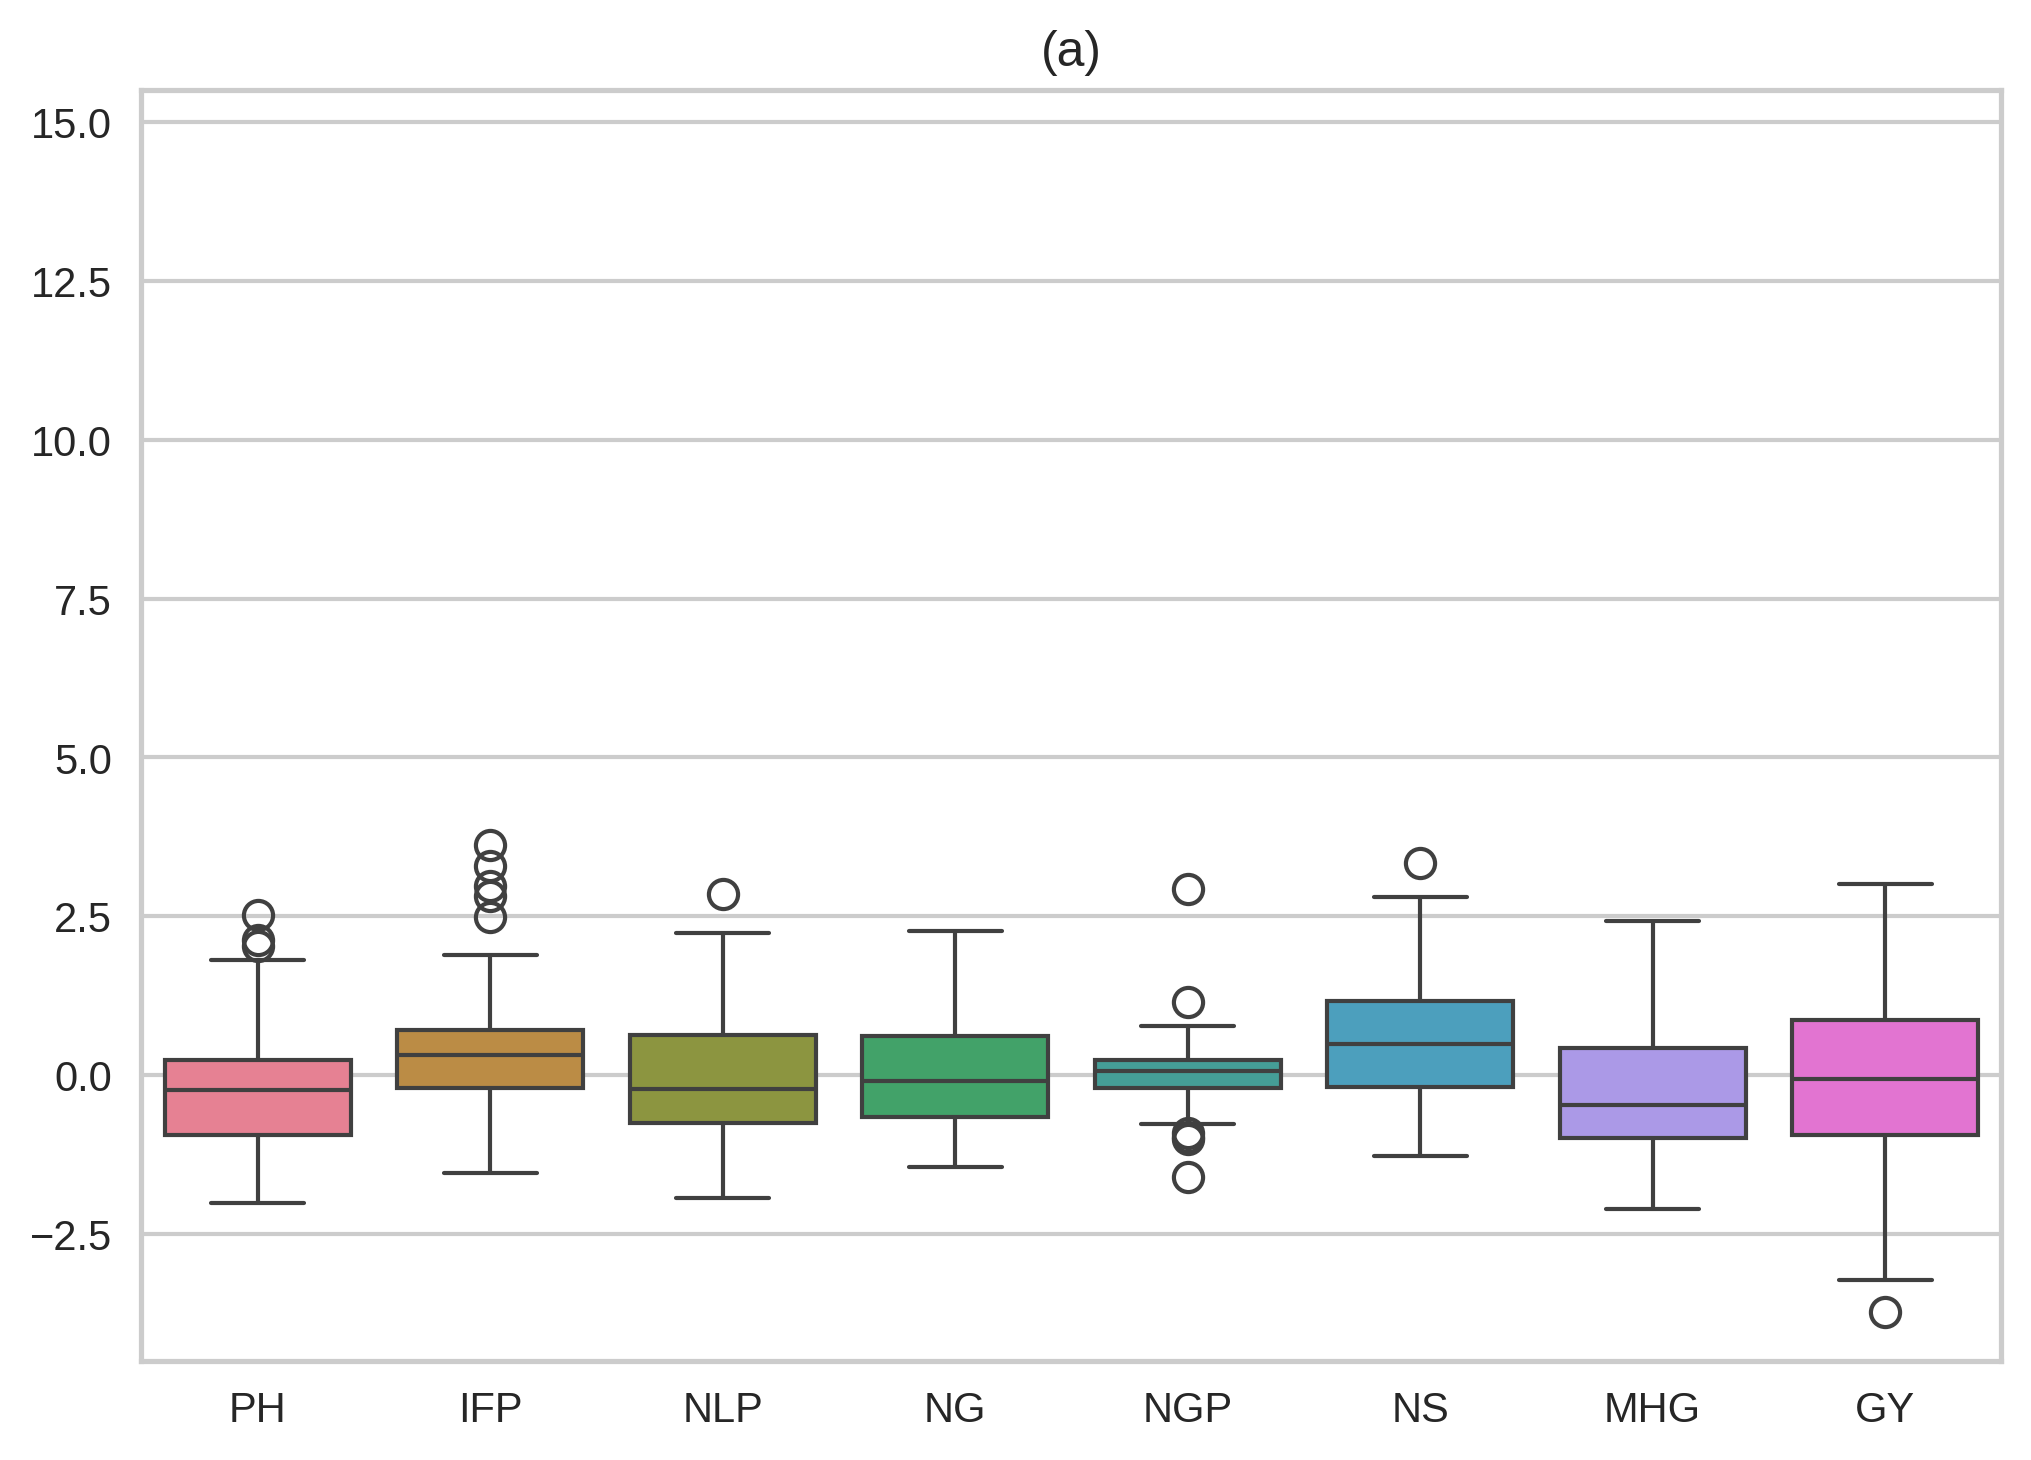

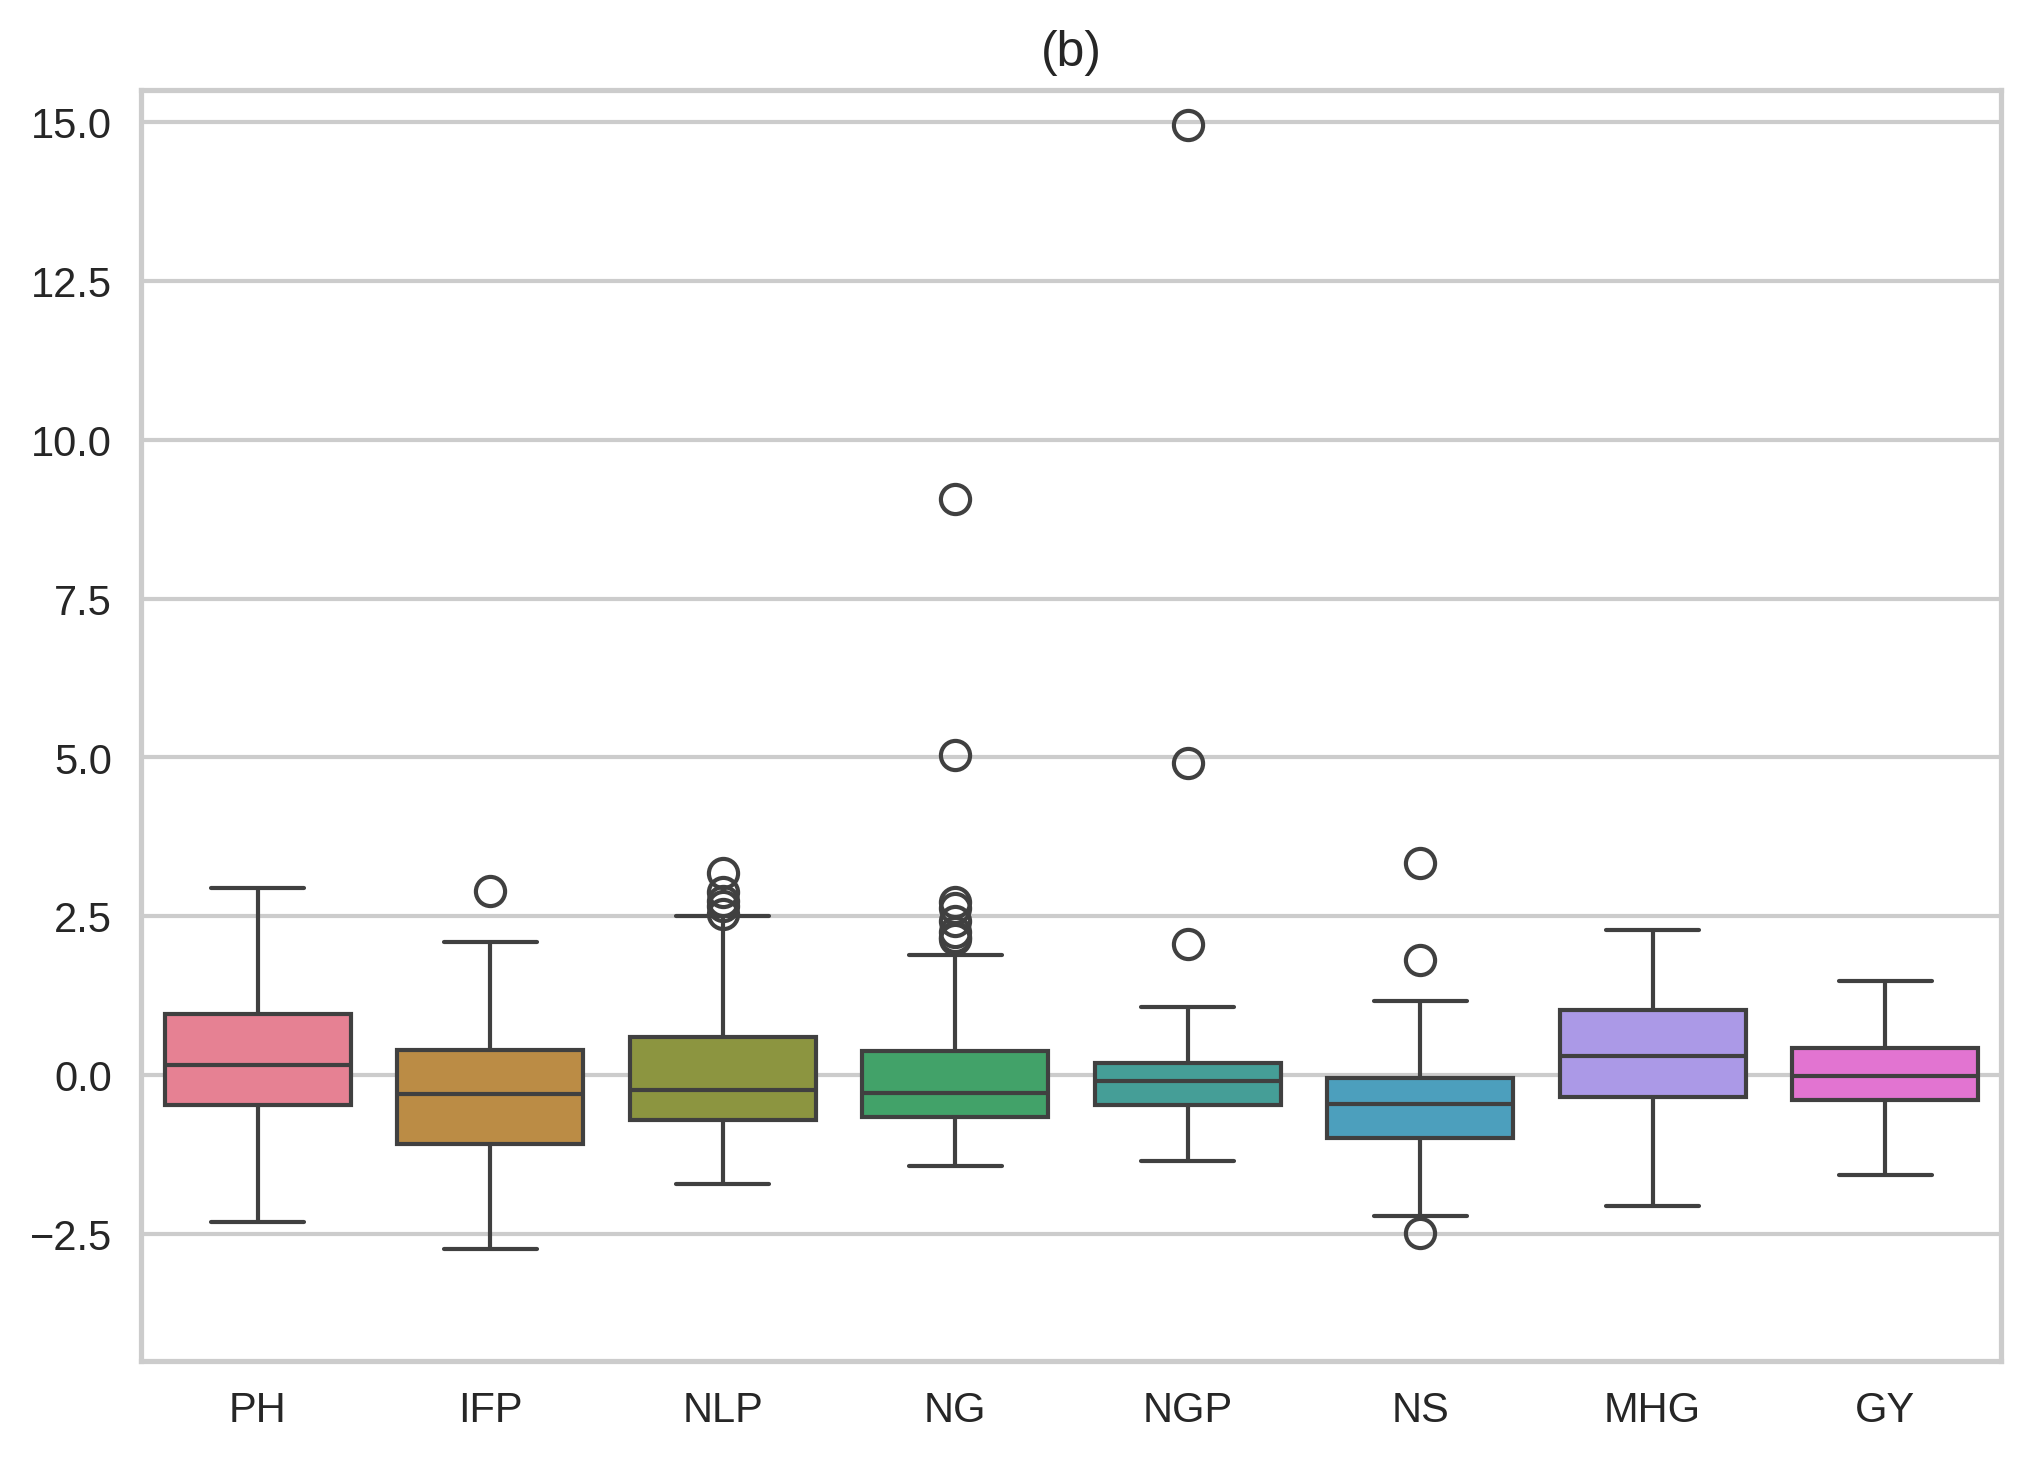

In [ ]:
# Mostra o boxplot para os diferentes períodos
plt.figure(dpi=300)
sns.boxplot(df_all_processed[df_all_processed['Season'] == 1][Vars])
plt.title('(a)')
plt.ylim((-4.5, 15.5))

plt.figure(dpi=300)
sns.boxplot(df_all_processed[df_all_processed['Season'] == 2][Vars])
plt.title('(b)')
plt.ylim((-4.5, 15.5))

# **First approach**

**Employs unsupervised learning (K-Means) to check whether the same cultivars are grouped into the same groups at different times, using variables selected by Wilcoxon signed-ranks test**

The results are presented in a heat map. For each number of clusters, the number of samples that were grouped into different groups in different periods is associated. This is done for each cultivar. Since, for each cultivar there are four replicates (four samples), if a cultivar has the number 4 on the heat map, it means that none of its samples remained in the same group. This indicates that this cultivar suffered more from the effects of being cultivated in different periods. On the other hand, if the number 0 appears, all samples of the cultivar remained in the same groups (clusters). This means that the cultivar is more stable in relation to the planted periods.

In [ ]:
# Selected vars
# Remove the NGP due to outliers presence
sel_vars.remove('NGP')

# Only for selected variables
df_time1_processed_sel = df_all_processed[df_all_processed['Season'] == 1][sel_vars].to_numpy()
df_time2_processed_sel = df_all_processed[df_all_processed['Season'] == 2][sel_vars].to_numpy()

## Silhouette score
Choose best number of cluster and analysis silhouette

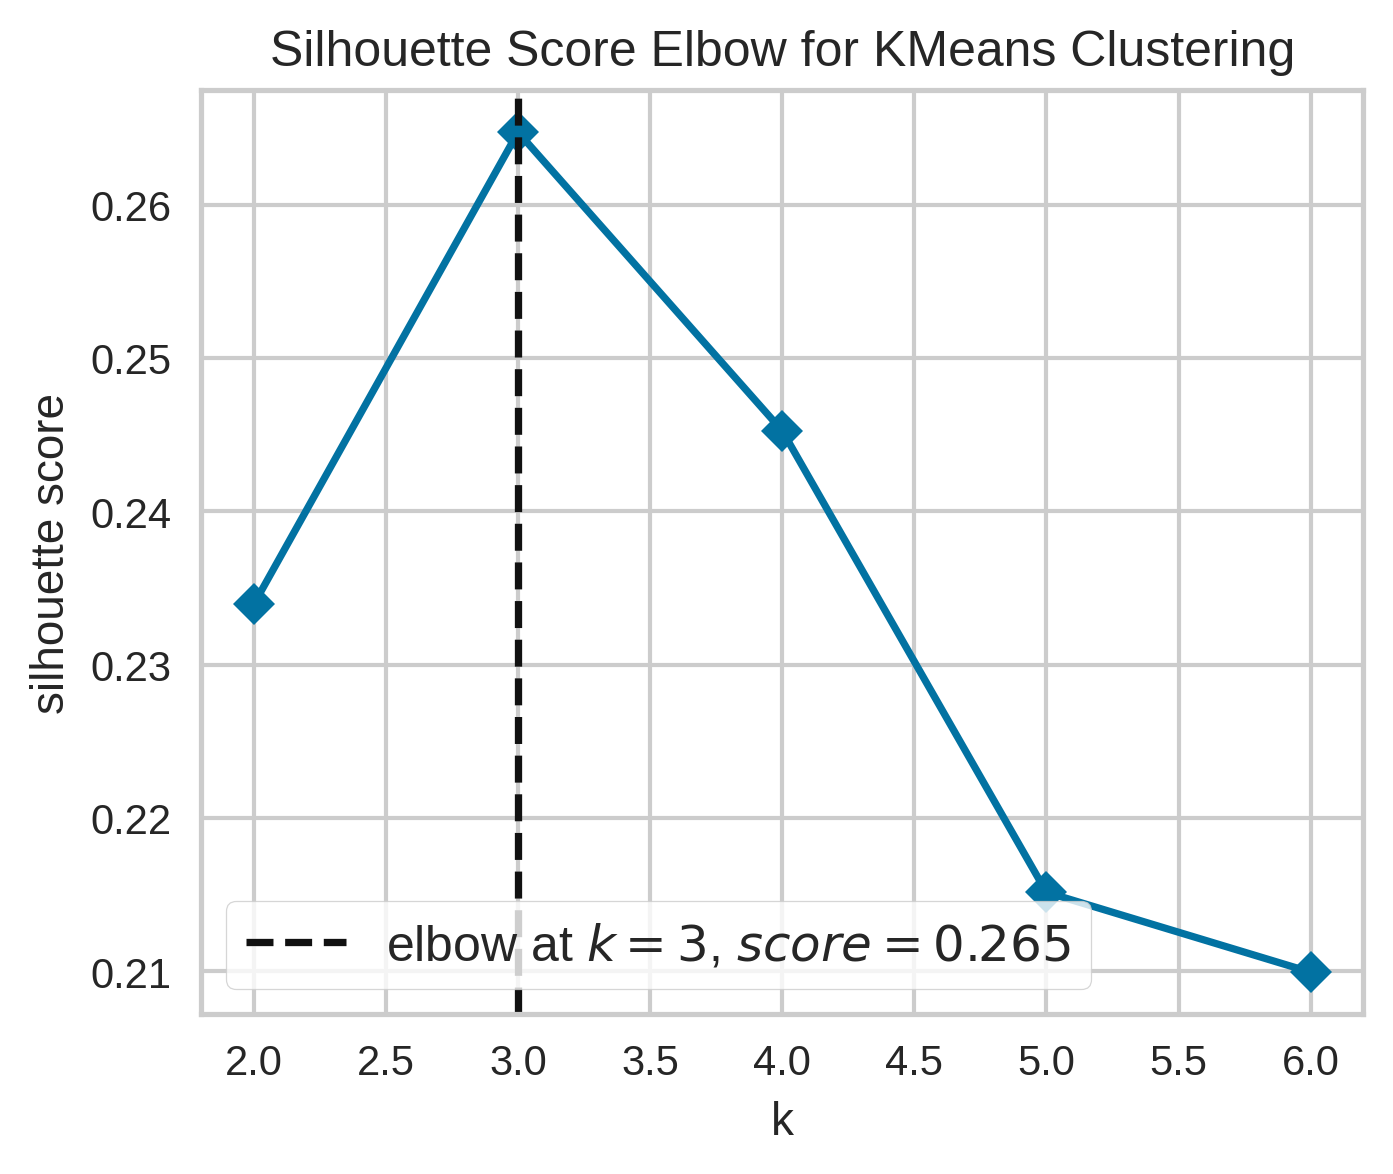

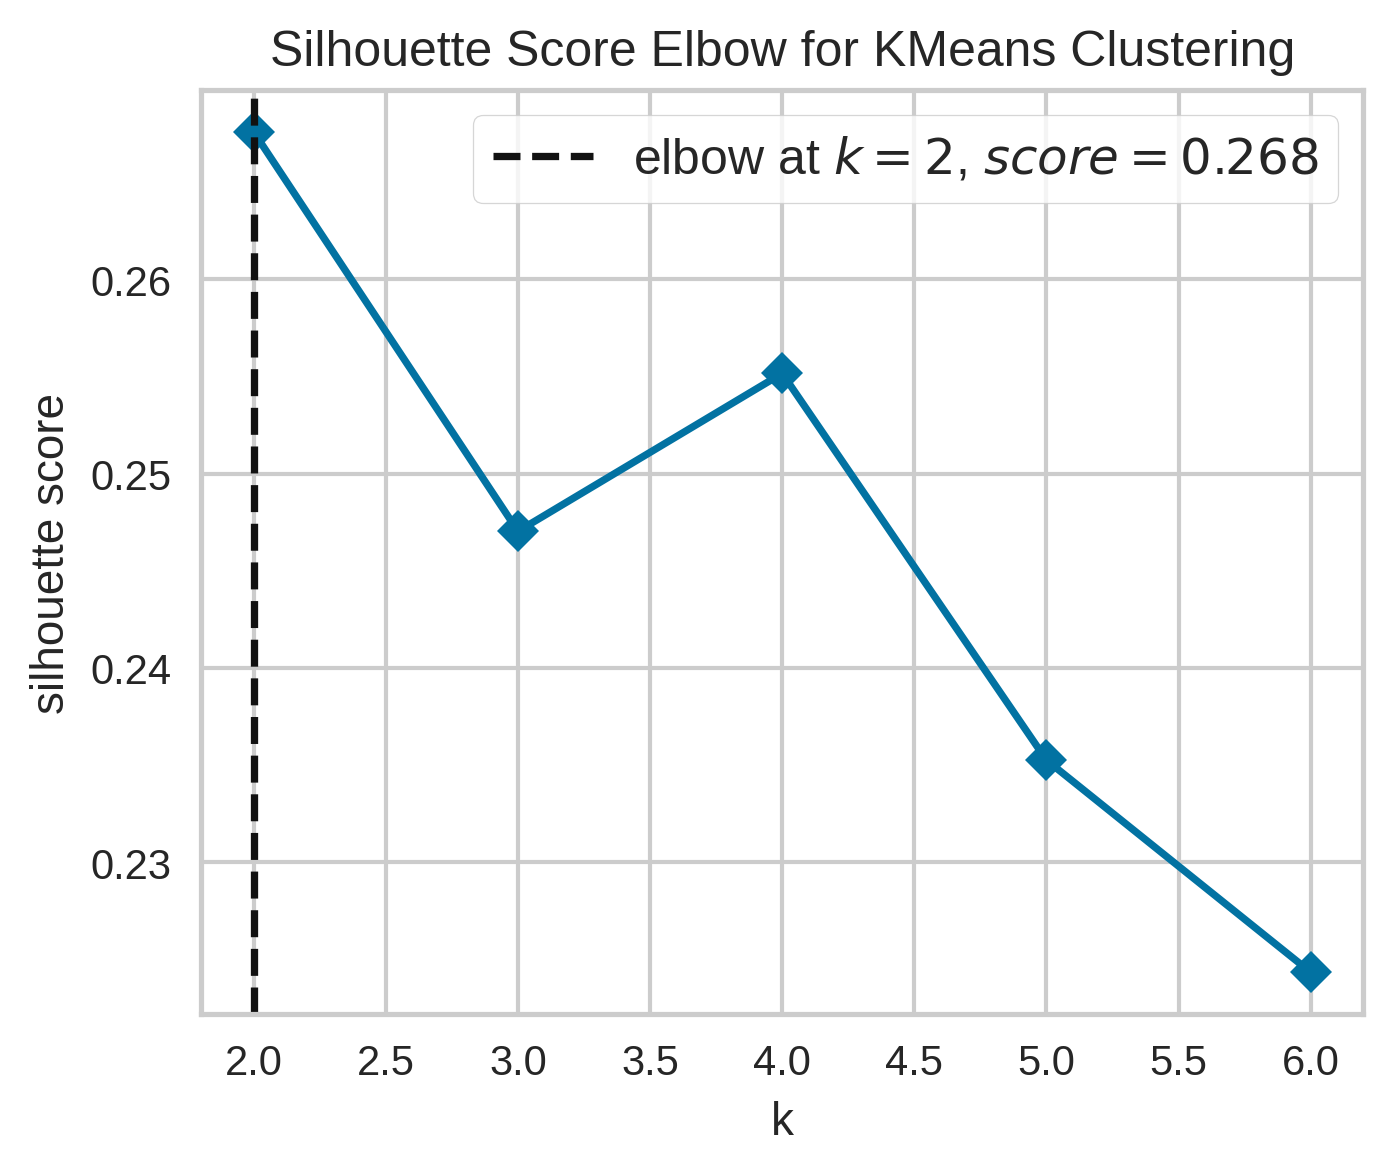

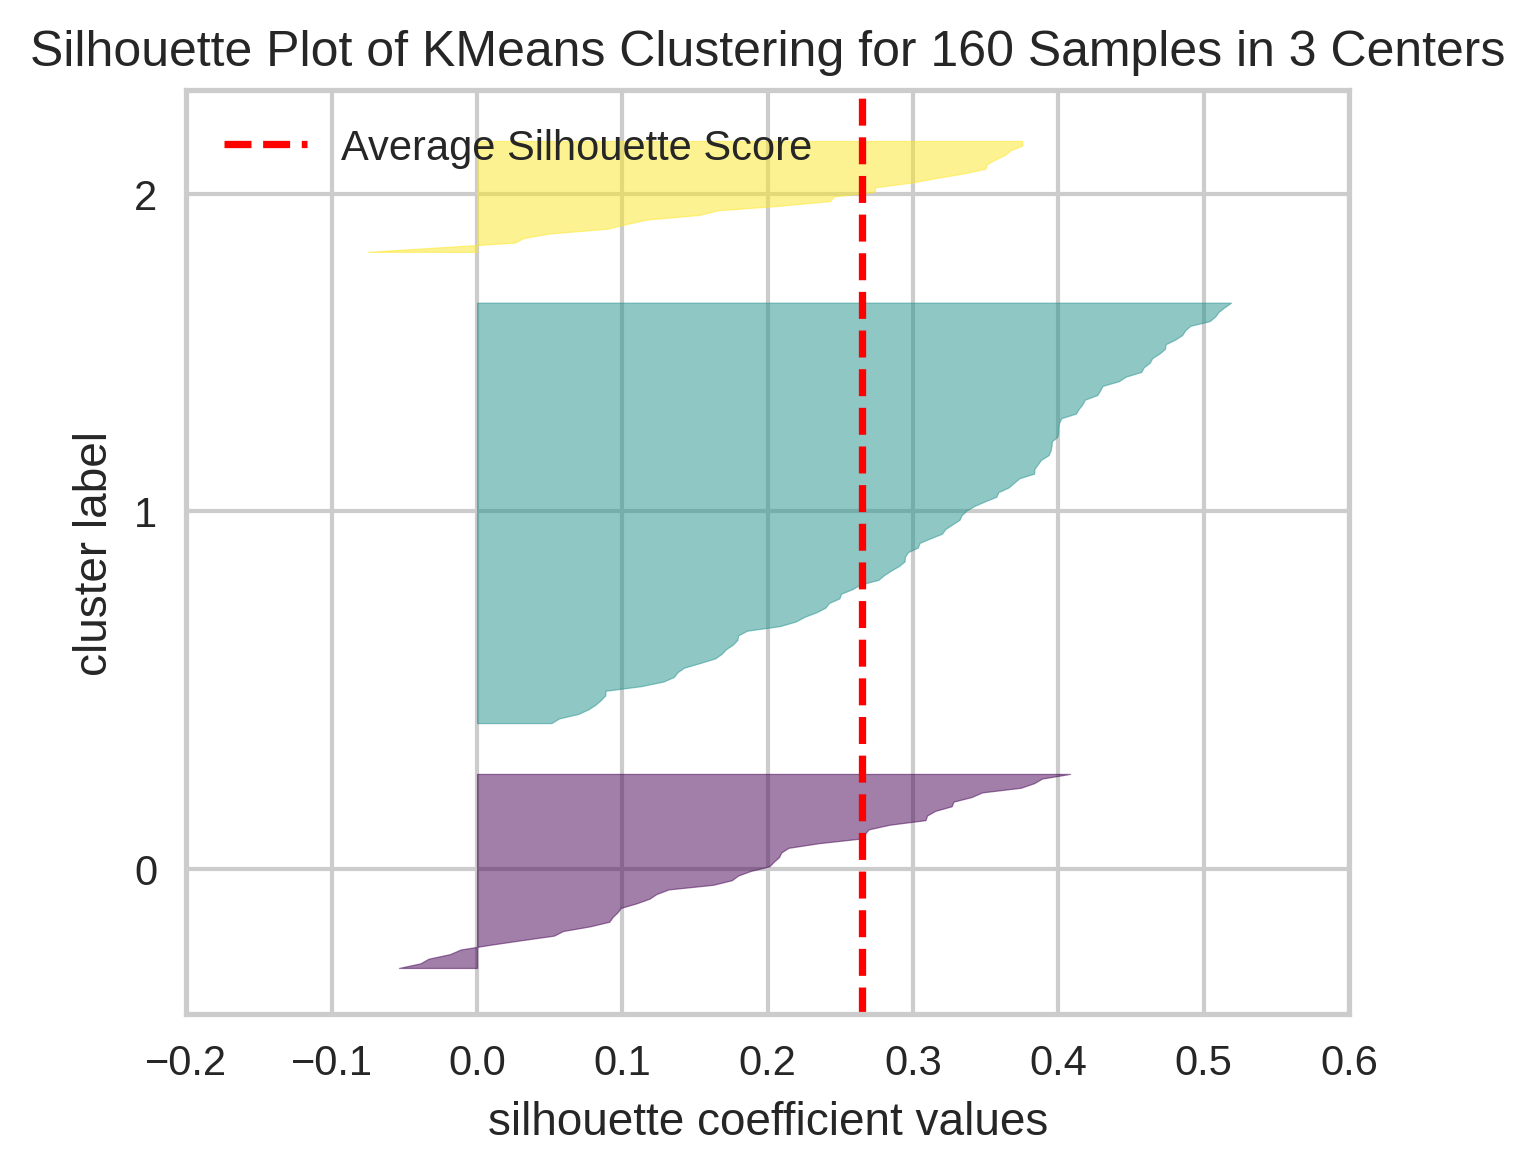

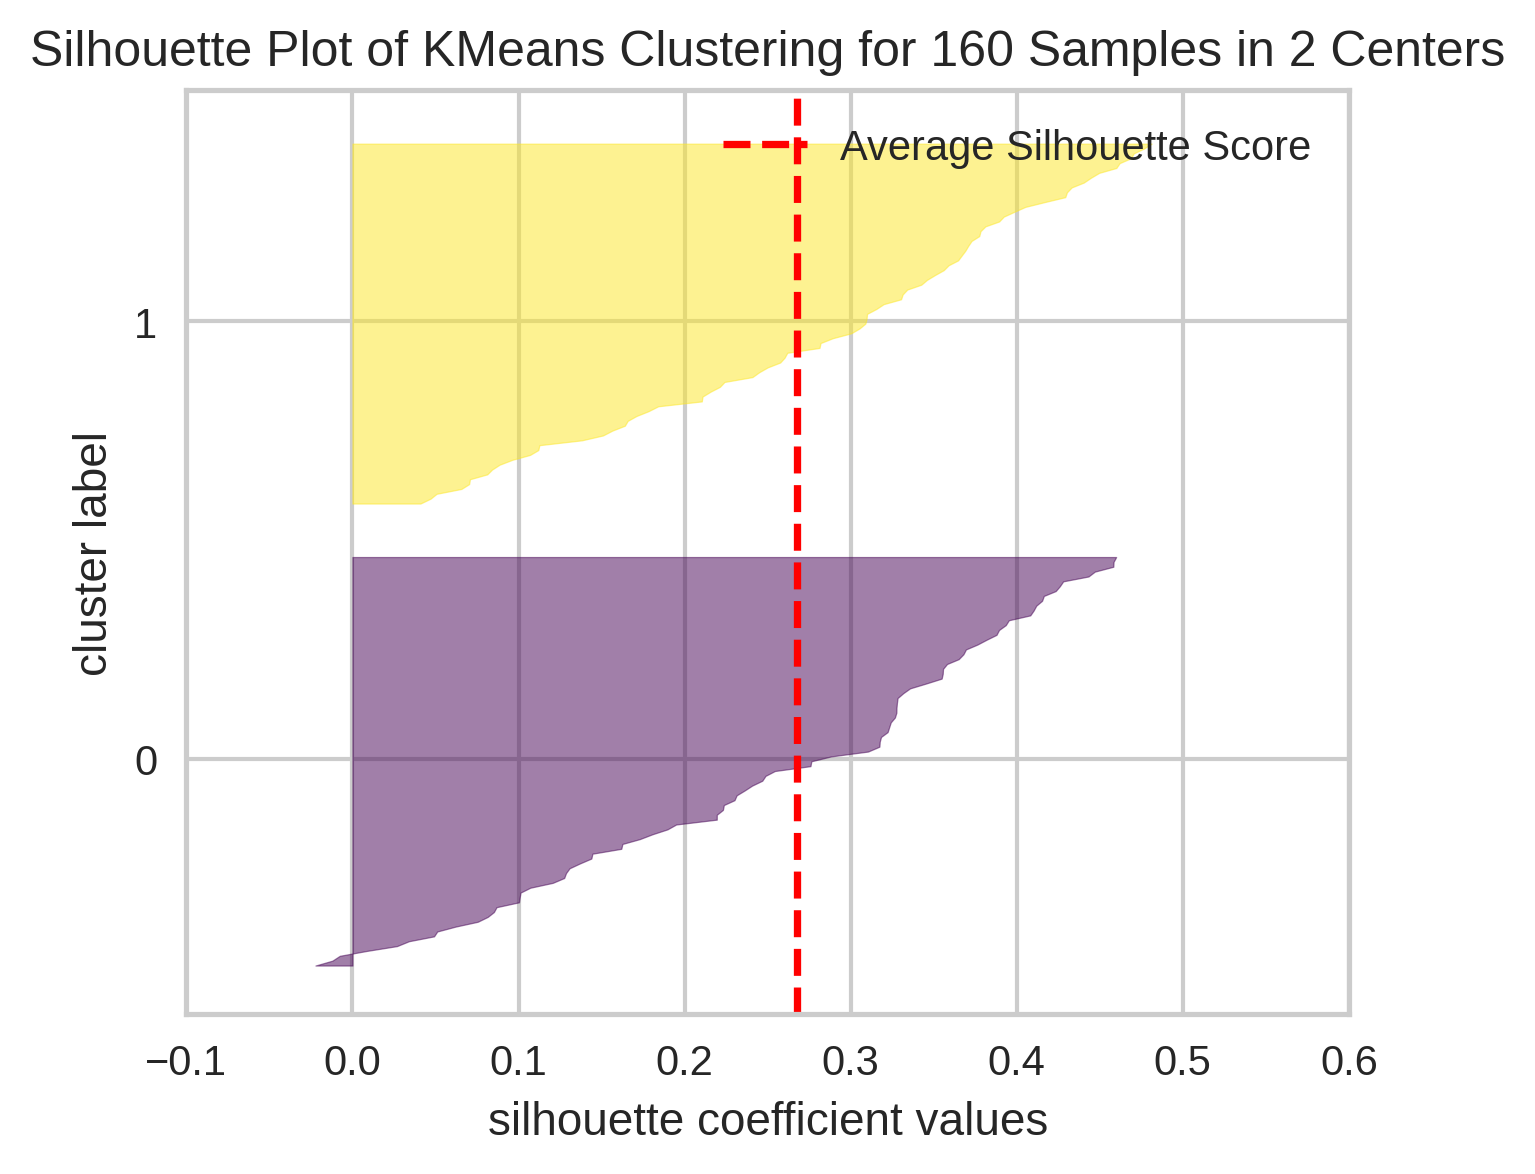

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 160 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Model
model = KMeans(n_init='auto', random_state=0)

# Total clusters
max_cluster = 6

figsize = (5, 4)

# For fisrt period
fig, ax = plt.subplots(dpi=300, figsize=figsize)
vis = KElbowVisualizer(model, k=(2, max_cluster + 1), timings= False, metric='silhouette', ax=ax)
vis.fit(df_time1_processed_sel)
ax.set_title('(a)')
vis.show()

# For second period
fig, ax = plt.subplots(dpi=300, figsize=figsize)
vis = KElbowVisualizer(model, k=(2, max_cluster + 1), timings= False, metric='silhouette', ax=ax)
vis.fit(df_time2_processed_sel)
ax.set_title('(b)')
vis.show()

# Model with best k
model_best_k2 = KMeans(n_clusters=3, n_init='auto', random_state=0)

# For fisrt period
fig, ax = plt.subplots(dpi=300, figsize=figsize)
visi = SilhouetteVisualizer(model_best_k2, colors='viridis', is_fitted=False, ax=ax)
visi.fit(df_time1_processed_sel)
ax.set_title('(a)')
visi.show()

model_best_k3 = KMeans(n_clusters=2, n_init='auto', random_state=0)

# For second period
fig, ax = plt.subplots(dpi=300, figsize=figsize)
visi = SilhouetteVisualizer(model_best_k3, colors='viridis', is_fitted=False, ax=ax)
visi.fit(df_time2_processed_sel)
ax.set_title('(b)')
visi.show()



## Apply K-Means

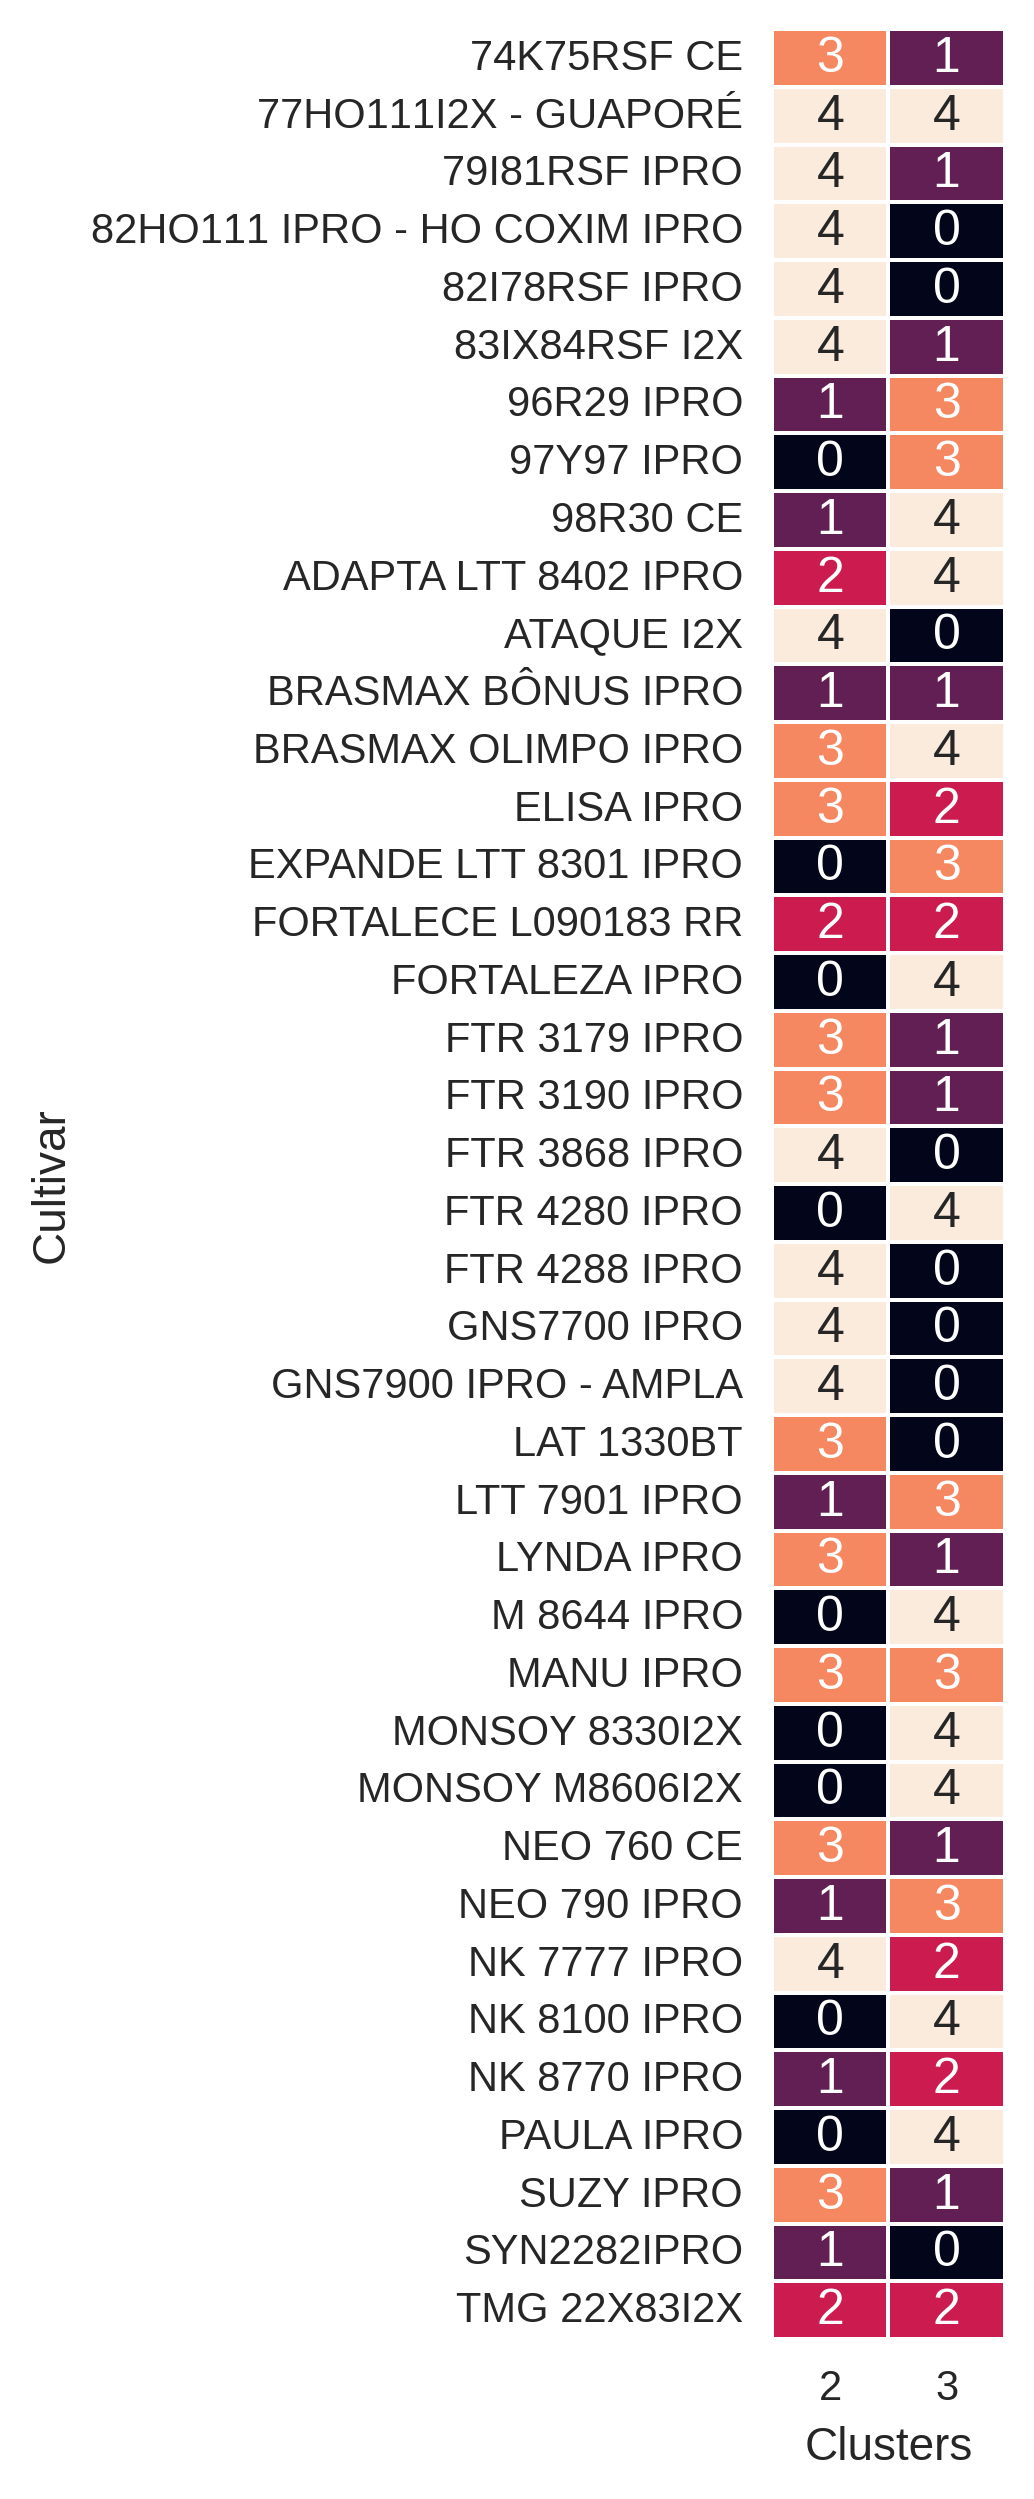

In [ ]:
'''
Apply the K-means algorithm to different planting periods and check whether the
Cultivar samples are classified into the same groups.
Makes a heat map showing, for the fixed quantities of clusters,
the number of samples that are grouped into different groups in the periods.
'''
amount_clusters = 3

# Armazena todos os dataframes com os totais de amostras de cada Cultivar
# que foram agrupados em grupos diferentes nos períodos
quantity_graphs    = []
quantity_groups_t1 = []
quantity_groups_t2 = []

for N_clusters in np.arange(2, amount_clusters + 1):

    # Aplica o algoritmo K-means nos diferentes períodos
    # compara as diferenças
    kmeans_time1 = KMeans(n_clusters=N_clusters, random_state=0, n_init="auto").fit(df_time1_processed_sel)
    kmeans_time2 = KMeans(n_clusters=N_clusters, random_state=0, n_init="auto").fit(df_time2_processed_sel)
    groups       = np.unique(np.concatenate([kmeans_time1.labels_ , kmeans_time2.labels_]))
    df_amount    = pd.DataFrame(data=np.array([kmeans_time1.labels_, kmeans_time2.labels_, df_time2['Cultivar'].T]).T, columns=['T1', 'T2', 'Cultivar'])
    d_samples    = {}

    for i in np.arange(0, len(df_time1), 4):
        cultivar = df_time1.iloc[i, 0]
        quantity_groups_t1.append([cultivar, N_clusters] + list(kmeans_time1.labels_[i:i + 4]))
        quantity_groups_t2.append([cultivar, N_clusters] + list(kmeans_time2.labels_[i:i + 4]))

        # Conta para cada cultivar o total de ocorrências em cada grupo
        # e calcula a diferença, depois retorna a diferença máxima
        # que será a quantidade de amostras agrupadas diferentemente
        total = []
        for group in groups:
            g1 = len(df_amount[(df_amount['Cultivar'] == cultivar) & (df_amount['T1'] == group)])
            g2 = len(df_amount[(df_amount['Cultivar'] == cultivar) & (df_amount['T2'] == group)])
            total.append(abs(g1 - g2))

        d_samples[cultivar] = max(total)

    # Armazena a quantide de amostras que foram agrupadas em diferentes cluster
    # nos diferentes períodos
    for n, cultivar_sel in enumerate(cultivars_names):
        quantity_graphs.append([cultivar_sel, N_clusters, d_samples[cultivar_sel]])

# Organiza o dataframe para exibir as informações em um mapa de calor
# da quantidade de amostras agrupadas para certas escolhas da quantidade de cluster
df_graph = pd.DataFrame(data=quantity_graphs, columns=['Cultivar', 'Clusters', 'Samples'])
df_graph = df_graph.pivot(index='Cultivar', columns='Clusters', values='Samples')

# Draw a heatmap for Cluster quantity
f, ax = plt.subplots(dpi=300, figsize=(1, 10))
sns.heatmap(df_graph, annot=True, fmt="d", linewidths=.5, ax=ax, cbar=False)
#ax.set_xlabel('Cluster quantity')
#ax.xaxis.tick_top()

# Esses dadaframes são utilizados mais abaixo, para mostrar como as amostras são
# agrupadas por cultivar
df_group_t1 = pd.DataFrame(data=quantity_groups_t1, columns=['Cultivar', 'Cluster label', 'Rep. 1', 'Rep. 2', 'Rep. 3', 'Rep. 4'])
df_group_t2 = pd.DataFrame(data=quantity_groups_t2, columns=['Cultivar', 'Cluster label', 'Rep. 1', 'Rep. 2', 'Rep. 3', 'Rep. 4'])

## Show all clusters

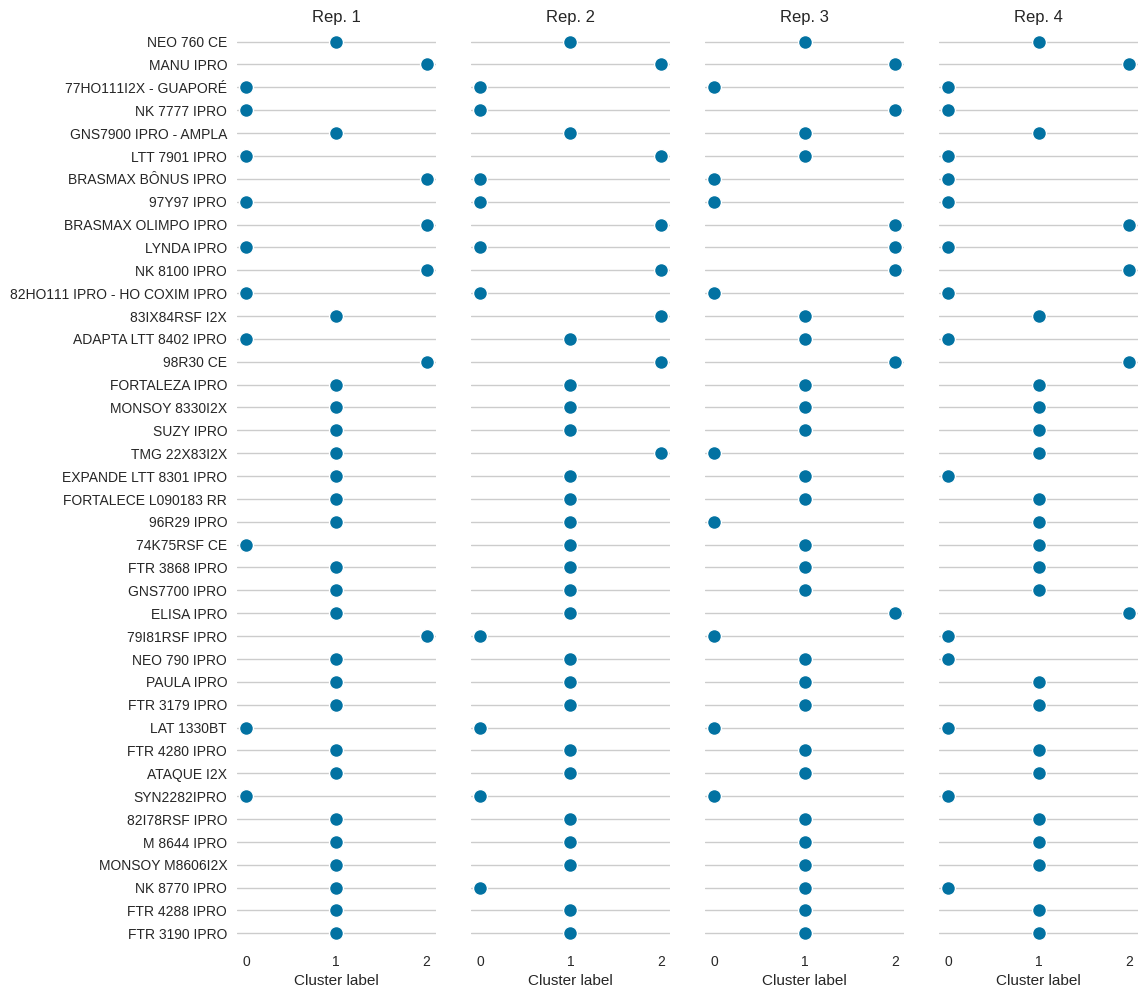

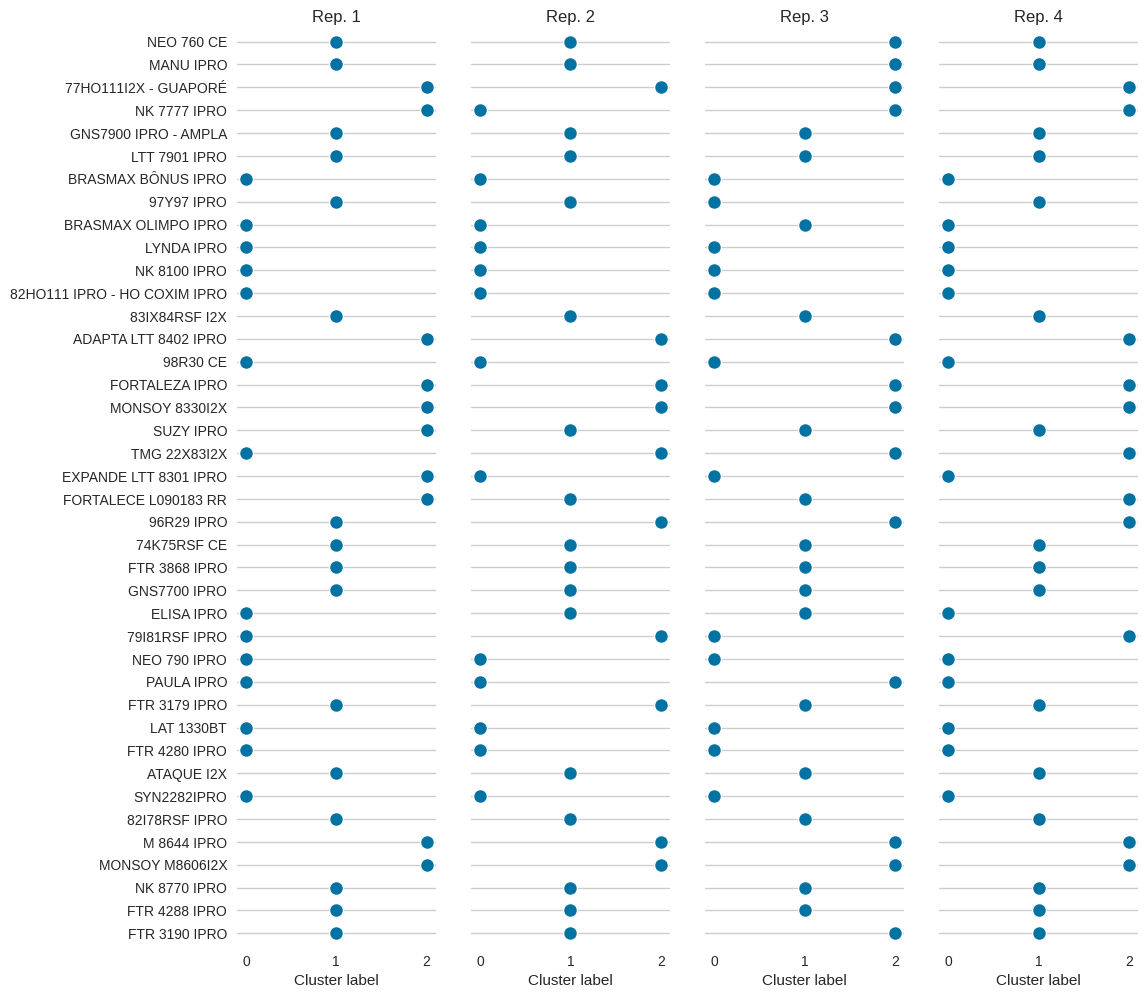

In [ ]:
'''
For each cluster quantity, construct a graph showing
how samples from each cultivar are grouped
'''
sel_cluster = 3

# Period 1
g = sns.PairGrid(df_group_t1[df_group_t1['Cluster label'] == sel_cluster],
                x_vars=df_group_t1.columns[2:], y_vars=["Cultivar"],
                height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=True, palette="rocket_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xticks=np.arange(0, sel_cluster), xlabel="Cluster label", ylabel="")

# Use semantically meaningful titles for the columns
titles = df_group_t1.columns[2:]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# Period 2
g = sns.PairGrid(df_group_t2[df_group_t2['Cluster label'] == sel_cluster],
                x_vars=df_group_t2.columns[2:], y_vars=["Cultivar"],
                height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=True, palette="rocket_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xticks=np.arange(0, sel_cluster), xlabel="Cluster label", ylabel="")

# Use semantically meaningful titles for the columns
titles = df_group_t2.columns[2:]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)